# Recurrent Neural Network

In [1]:
#Step 1) Importing the Libraries:
import pandas as pd  #Analysis
import numpy as np   #Number operations
import matplotlib.pyplot as plt  #Visualization
from sklearn.preprocessing import MinMaxScaler  #Scaling
from keras.models import Sequential  #model
from keras.layers import Dense     #hidden layer
from keras.layers import LSTM      #for long-short term memory for exploding gradient problem
from keras.layers import Dropout   #how much the droping should be done in LSTM


In [65]:
#Step 2) Import the dataset:
train_df=pd.read_csv(r"E:\Dataset_for_Analysis\AI DEEP LEARNING\RNN\Google_Stock_Price_Train.csv")
train_df.head(10)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


In [66]:
train_df1=train_df.copy()
train_df1.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [67]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [68]:
train_df1["Open"].values  #Here, its an one dimension

array([325.25, 331.27, 329.83, ..., 793.7 , 783.33, 782.75])

In [69]:
train_df1.iloc[:,1:2].values  #Here, its multidimension in nature, taking this since it will be apt for scaling and training

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [70]:
training_set=train_df1.iloc[:,1:2].values
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [71]:
# Scaling:  #sc-scaling
sc=MinMaxScaler()
scaled_training_set=sc.fit_transform(training_set)  #using the minmax for value range[0-1]

In [72]:
print(scaled_training_set)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [73]:
length=len(scaled_training_set)
print(length)  #its for manually splitting train and test data #using #80:20 ratio

1258


In [74]:
train=int(length*0.80)  #want the train data at 80.20 ratio
print(train)

1006


In [47]:
X_train = []
Y_train = []
for i in range(252,1258):  #in order to get the 1006 data for train using the manual split
    X_train.append(scaled_training_set[i-252:i,0])
    Y_train.append(scaled_training_set[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [48]:
Y_train

array([0.15661508, 0.16227026, 0.16236327, ..., 0.95725128, 0.93796041,
       0.93688146])

In [49]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.12941811, 0.1474254 ,
        0.15252251],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.1474254 , 0.15252251,
        0.15661508],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.15252251, 0.15661508,
        0.16227026],
       ...,
       [0.90700573, 0.92544088, 0.91223305, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92544088, 0.91223305, 0.86293623, ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.91223305, 0.86293623, 0.86935412, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [50]:
len(X_train)

1006

In [51]:
len(Y_train)

1006

In [85]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1)) 
len(X_train)   #Reshaping

1006

In [86]:
regressor = Sequential() #Calling the RNN

In [89]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.15))

In [90]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.15))   #Second_layer

In [91]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.15))   #Third_layer

In [92]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.15))   #fourth_layer  Since LSTM has four layers

In [93]:
regressor.add(Dense(units = 1))  #adding Output layer

In [94]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') #Configures the model for training.

In [95]:
regressor.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
32/32 [==============================] - 10s 195ms/step - loss: 0.0607
Epoch 2/100
32/32 [==============================] - 6s 196ms/step - loss: 0.0061
Epoch 3/100
32/32 [==============================] - 6s 197ms/step - loss: 0.0059
Epoch 4/100
32/32 [==============================] - 6s 199ms/step - loss: 0.0054
Epoch 5/100
32/32 [==============================] - 6s 195ms/step - loss: 0.0047
Epoch 6/100
32/32 [==============================] - 6s 197ms/step - loss: 0.0051
Epoch 7/100
32/32 [==============================] - 6s 192ms/step - loss: 0.0047
Epoch 8/100
32/32 [==============================] - 6s 193ms/step - loss: 0.0044
Epoch 9/100
32/32 [==============================] - 6s 194ms/step - loss: 0.0045
Epoch 10/100
32/32 [==============================] - 6s 192ms/step - loss: 0.0043
Epoch 11/100
32/32 [==============================] - 6s 193ms/step - loss: 0.0051
Epoch 12/100
32/32 [==============================] - 6s 190ms/step - loss: 0.0047
Epoch 13/100

32/32 [==============================] - 6s 189ms/step - loss: 0.0014
Epoch 100/100
32/32 [==============================] - 6s 190ms/step - loss: 0.0014


In [96]:
#Importing the test_dataset
test_df=pd.read_csv(r"E:\Dataset_for_Analysis\AI DEEP LEARNING\RNN\Google_Stock_Price_Test.csv")
test_df.head()  #now take the open and append it to existing dataframe

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [97]:
test_df1=test_df.copy()
test_df1.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [100]:
train_df1.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [101]:
test_df1.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [102]:
total_data = pd.concat((train_df1['Open'], test_df1['Open']), axis = 0) # rows concating to get target

In [103]:
total_data.head(10)

0    325.25
1    331.27
2    329.83
3    328.34
4    322.04
5    313.70
6    310.59
7    314.43
8    311.96
9    314.81
Name: Open, dtype: float64

In [108]:
len(total_data)

1278

In [105]:
#above is the test data 
inputs = total_data[len(total_data) - len(test_df1) - 252:].values

In [106]:
inputs = inputs.reshape(-1,1)  #Reshaping 

In [107]:
inputs = sc.transform(inputs)  #since already fit_transform done for train_dataset

In [109]:
len(inputs)

272

In [110]:
#Splitting the data
X_test = []
for i in range(252,272):
    X_test.append(inputs[i-252:i,0])

In [111]:
X_test = np.array(X_test)

In [112]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [113]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [114]:
real_stock_price=test_df1.iloc[:,1:2].values

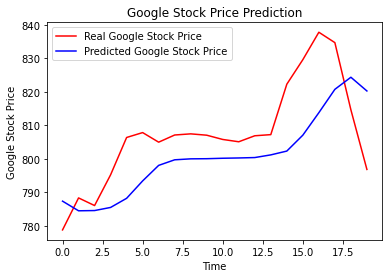

In [115]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [118]:
from sklearn.metrics import r2_score
r2 = r2_score(real_stock_price, predicted_stock_price)
print("R2 score=",r2)

R2 score= 0.2213885374576382


In [119]:
print(predicted_stock_price)

[[787.39386]
 [784.5182 ]
 [784.58966]
 [785.51855]
 [788.2446 ]
 [793.43445]
 [798.07227]
 [799.7365 ]
 [800.0233 ]
 [800.0641 ]
 [800.20013]
 [800.2865 ]
 [800.4074 ]
 [801.2049 ]
 [802.3432 ]
 [807.0897 ]
 [813.7966 ]
 [820.7682 ]
 [824.3794 ]
 [820.28064]]


In [120]:
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]
